## Introduction

This project will analyze stock market data, determine whether stocks are over or under valued. The Market data I used is acquired form [finviz](http://finviz.com).

In [73]:
# Load required library
ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg)) 
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}
packages <- c("plyr","ggplot2","reshape2", "zoo", "dplyr")
ipak(packages)

plyr  ggplot2 reshape2      zoo    dplyr 
    TRUE     TRUE     TRUE     TRUE     TRUE

## Acquiring stock market data

First, let's go to [http://finviz.com/
screener.ashx](http://finviz.com/
screener.ashx)

For this project, I export all the fields for all the companies. Go to this page [data](http://finviz.com/screener.ashx?v=152&c=0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70), scroll all the way to the bottom right of the screen, there should be an export link. Click on this link and save the CSV file as finviz.csv.

Finally, read the finviz.csv file.

In [18]:
finviz <- read.csv("path/finviz.csv", stringsAsFactors = F)

## Summarizing the data

In [19]:
str(finviz)

'data.frame':	6706 obs. of  69 variables:
 $ No.                              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Ticker                           : chr  "A" "AA" "AADR" "AAIT" ...
 $ Company                          : chr  "Agilent Technologies Inc." "Alcoa, Inc." "WCM/BNY Mellon Focused Growth ADR ETF" "iShares MSCI AC Asia Information Tech" ...
 $ Sector                           : chr  "Healthcare" "Basic Materials" "Financial" "Financial" ...
 $ Industry                         : chr  "Medical Laboratories & Research" "Aluminum" "Exchange Traded Fund" "Exchange Traded Fund" ...
 $ Country                          : chr  "USA" "USA" "USA" "USA" ...
 $ Market.Cap                       : num  19506 10818 NA NA 9862 ...
 $ P.E                              : num  28.1 40.4 NA NA 26 ...
 $ Forward.P.E                      : num  16.52 24.72 NA NA 8.55 ...
 $ PEG                              : num  2.92 1.91 NA NA NA NA NA 2.06 NA 3.49 ...
 $ P.S                              : num  2.88 0

## Cleaning and exploring the data

Imported numeric data often contains special characters such as percentage signs,
dollar signs, commas, and so on. This causes R to think that the field is a character
field instead of a numeric field. We need clean them.

In [20]:
# create a function for multiple use
clean_numeric <- function(s){
    s <- gsub("%|\\$|,|\\)|\\(", "", s)
    s <- as.numeric(s)
}

In [21]:
finviz <- cbind(finviz[,1:6],apply(finviz[,7:68], 2, clean_numeric))

In [22]:
sapply(finviz,class)

No.                            Ticker 
                        "integer"                       "character" 
                          Company                            Sector 
                      "character"                       "character" 
                         Industry                           Country 
                      "character"                       "character" 
                       Market.Cap                               P.E 
                        "numeric"                         "numeric" 
                      Forward.P.E                               PEG 
                        "numeric"                         "numeric" 
                              P.S                               P.B 
                        "numeric"                         "numeric" 
                           P.Cash                  P.Free.Cash.Flow 
                        "numeric"                         "numeric" 
                   Dividend.Yield                      Payout.Ratio 
                        "numeric"                         "numeric" 
                        EPS..ttm.              EPS.growth.this.year 
                        "numeric"                         "numeric" 
             EPS.growth.next.year           EPS.growth.past.5.years 
                        "numeric"                         "numeric" 
          EPS.growth.next.5.years         Sales.growth.past.5.years 
                        "numeric"                         "numeric" 
  EPS.growth.quarter.over.quarter Sales.growth.quarter.over.quarter 
                        "numeric"                         "numeric" 
               Shares.Outstanding                      Shares.Float 
                        "numeric"                         "numeric" 
                Insider.Ownership              Insider.Transactions 
                        "numeric"                         "numeric" 
          Institutional.Ownership        Institutional.Transactions 
                        "numeric"                         "numeric" 
                      Float.Short                       Short.Ratio 
                        "numeric"                         "numeric" 
                 Return.on.Assets                  Return.on.Equity 
                        "numeric"                         "numeric" 
             Return.on.Investment                     Current.Ratio 
                        "numeric"                         "numeric" 
                      Quick.Ratio                    LT.Debt.Equity 
                        "numeric"                         "numeric" 
                Total.Debt.Equity                      Gross.Margin 
                        "numeric"                         "numeric" 
                 Operating.Margin                     Profit.Margin 
                        "numeric"                         "numeric" 
               Performance..Week.               Performance..Month. 
                        "numeric"                         "numeric" 
            Performance..Quarter.           Performance..Half.Year. 
                        "numeric"                         "numeric" 
               Performance..Year.                 Performance..YTD. 
                        "numeric"                         "numeric" 
                             Beta                Average.True.Range 
                        "numeric"                         "numeric" 
                Volatility..Week.                Volatility..Month. 
                        "numeric"                         "numeric" 
    X20.Day.Simple.Moving.Average     X50.Day.Simple.Moving.Average 
                        "numeric"                         "numeric" 
   X200.Day.Simple.Moving.Average                      X50.Day.High 
                        "numeric"                         "numeric" 
                      X50.Day.Low                     X52.Week.High 
                        "numeric"                         "numeric" 
                     X52.Wee

Now ready to explore the data.

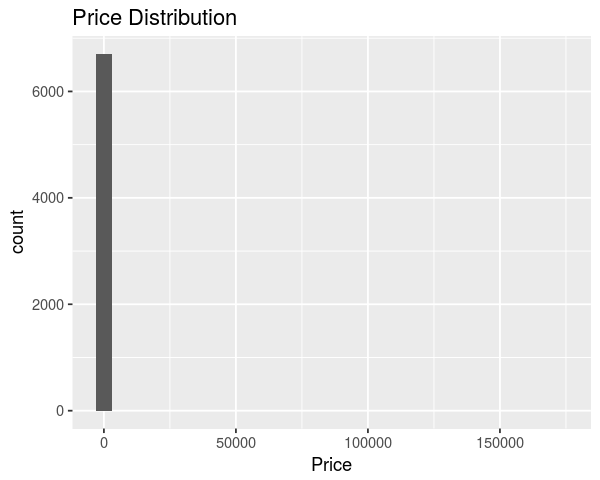

In [42]:
ggplot(finviz, aes(x = Price)) + geom_histogram(bins = 30) + ggtitle("Price Distribution") + xlab("Price")

Outlier stocks with very high prices cause R to scale the x axis of the histogram in such a way as to make the graph useless.

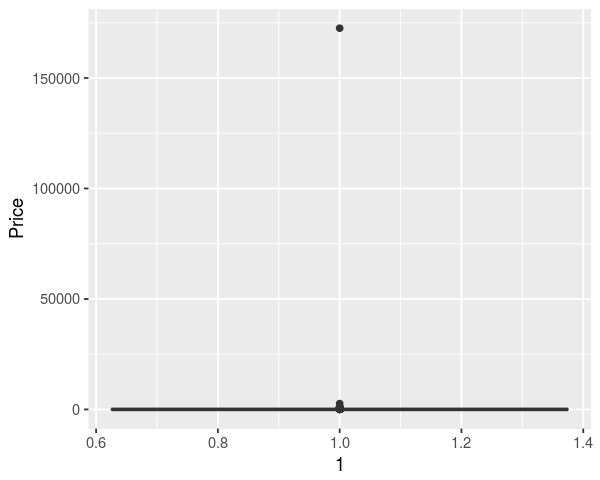

In [46]:
ggplot(finviz, aes(x = 1, y = Price)) + geom_boxplot()

From box plot, we can see there is a outlier, so I put a cap on the Price.

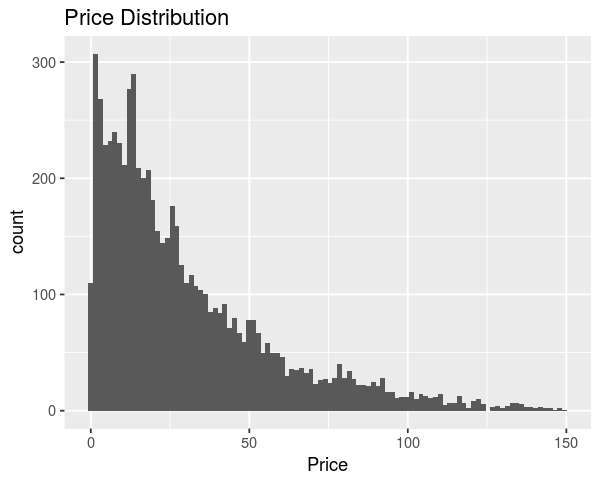

In [51]:
ggplot(finviz[finviz$Price < 150,], aes(x = Price)) + 
    geom_histogram(bins = 100) + 
    ggtitle("Price Distribution") + 
    xlab("Price")

It shows the majority of stocks are priced under $50$, maybe a stock that priced at $100$ is considered expensive.

Let's take a look of average prices by different sector.

In [64]:
sector_avg <- ddply(finviz, ~Sector, summarize, Sector_Avg_Price = mean(Price))

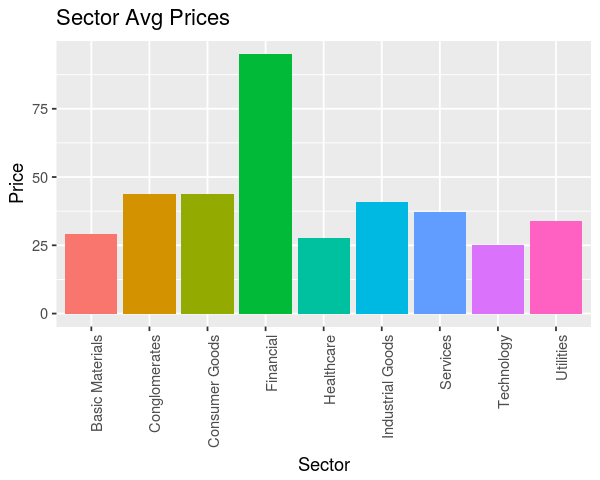

In [101]:
ggplot(sector_avg, aes(x=Sector, y=Sector_Avg_Price,fill=Sector)) +
  geom_bar(stat="identity") + ggtitle("Sector Avg Prices") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  guides(fill=FALSE) + 
  ylab("Price")

Stocks in the financial sector seem to have a significantly higher average price than other sectors. I think the main reason is the outliers.

Let's find out which Industries and companies are responsible for making the average price of the financial sector so much higher.

In [76]:
industry_chart <- finviz %>% ddply(.(Sector, Industry), 
                                        summarise, Industry_Avg_Price = mean(Price)) %>%
    arrange(Sector, Industry) %>%
    filter(Sector=="Financial")

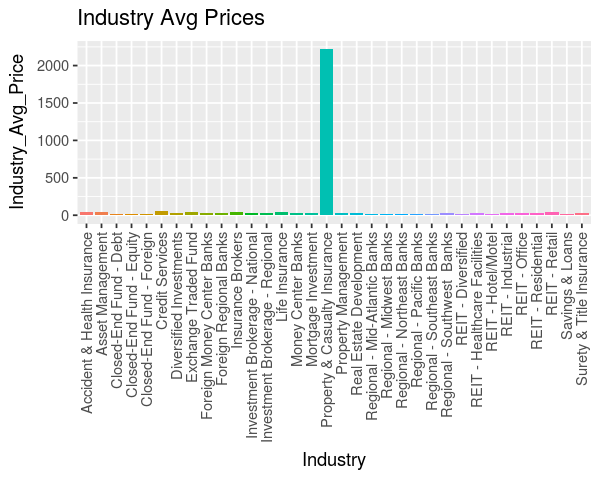

In [122]:
ggplot(industry_chart, aes(x=Industry, y=Industry_Avg_Price,
                           fill=Industry)) +
  geom_bar(stat="identity") + theme(legend.position="none") +
  ggtitle("Industry Avg Prices") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

From this graph, it looks like the Property & Casualty Insurance industry is the main
reason that is driving the average prices up.

In [79]:
options(repr.plot.width=6, repr.plot.height=4)

Next, let's go further into the Property & Casualty Insurance industry.

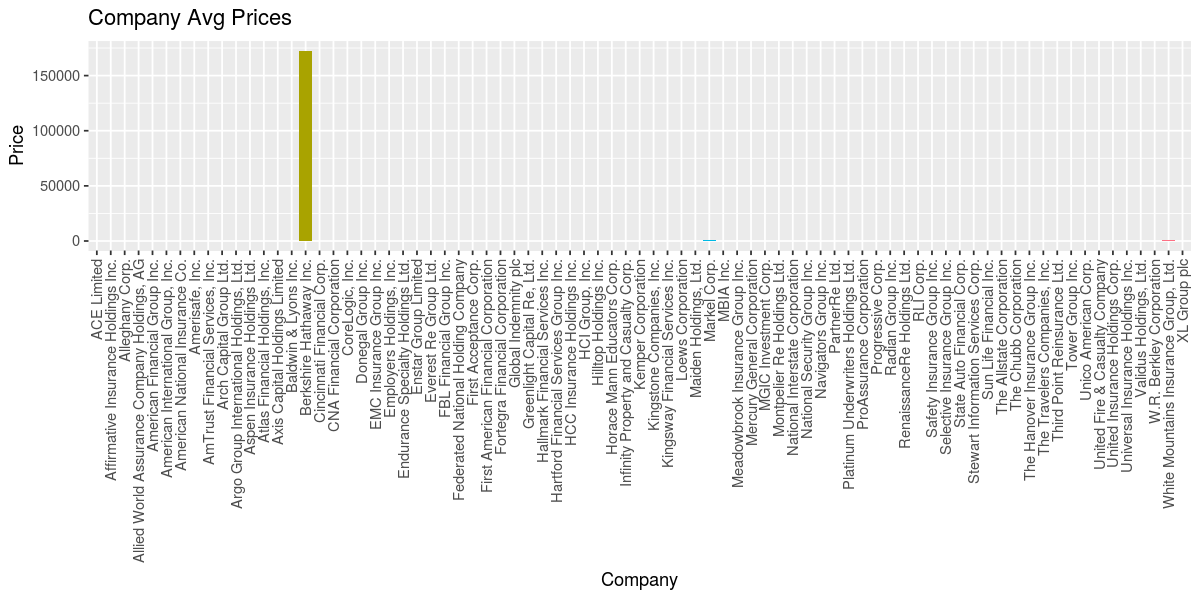

In [92]:
company_chart <- filter(finviz, Industry=="Property & Casualty Insurance")

ggplot(company_chart, aes(x=Company, y=Price, fill=Company)) +
  geom_bar(stat="identity") + theme(legend.position="none") +
  ggtitle("Company Avg Prices") +
  theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.5))

It is clear that the outlier company is Berkshire Hathaway, where the stock price is currently over $172,000 per share.

Since their stock price is so extreme, let's remove them from the dataset and then re-average the sectors so that we have a more realistic average price for the financial sector.

In [93]:
finviz <- filter(finviz, Ticker != "BRK-A")
sector_avg_prices <- finviz %>% ddply(~Sector, summarize, Sector_Avg_Price = mean(Price))

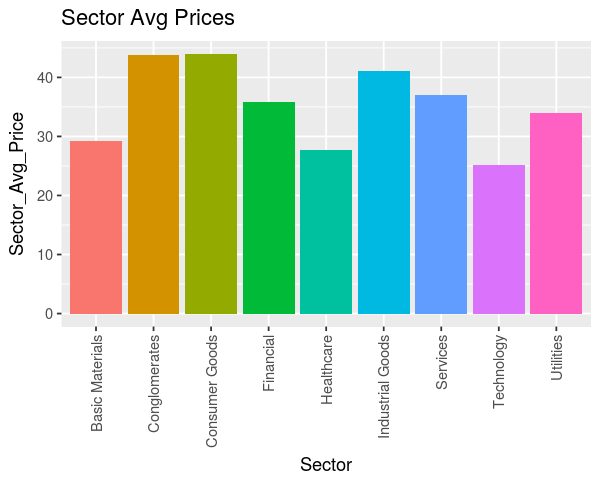

In [100]:
ggplot(sector_avg_prices, aes(x=Sector, y=Sector_Avg_Price,
                              fill=Sector)) +
  geom_bar(stat="identity") + ggtitle("Sector Avg Prices") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5)) +
  guides(fill=FALSE)

Now, our averages look much better and we have a decent basis to compare stock prices to their industry and sector averages.

## Generating relative valuations

One of the most interesting things with stock market data is come up with a valuation model. The ultimate goal is to arrive at a decision about whether the stock might be overvalued or undervalued. Relative valuation will quickly
provide a sense of how the stock is valued but does not take into account a comprehensive set of factors. The basic idea is that it compares a stock's price and valuation ratios to similar stocks to arrive at a conclusion. Now, we will value stocks using the simpler relative valuation method.

Calculate **sector** averages for fields that we can use in our relative valuation efforts.

In [126]:
sector_avg <- finviz %>% melt(id = "Sector") %>% 
    filter(variable %in% c("Price","P.E","PEG","P.S","P.B")) %>%
    na.omit %>%
    mutate(value = as.numeric(value)) %>% 
    dcast(Sector ~ variable, mean)

colnames(sector_avg)[2:6] <- c("SAvgPE","SAvgPEG","SAvgPS","SAvgPB","SAvgPrice")

In [134]:
head(sector_avg)

Sector,SAvgPE,SAvgPEG,SAvgPS,SAvgPB,SAvgPrice
Basic Materials,47.36968,15.496226,1238.241961,9.340864,29.20314
Conglomerates,12.36286,1.483333,1.440000,64.275882,43.72647
Consumer Goods,32.29997,3.756511,1.408874,5.612817,43.95360
Financial,33.96605,4.891060,11.654328,4.240386,35.86712
Healthcare,42.07692,12.321098,166.923969,8.796951,27.74855
Industrial Goods,32.72555,3.132356,1.888440,3.924167,41.00675


Calculate **industry** averages for fields that we can use in our relative valuation efforts.

In [132]:
industry_avg <- finviz %>% melt(id=c("Sector","Industry")) %>%
    filter(variable %in% c("Price","P.E","PEG","P.S","P.B")) %>%
    na.omit %>%
    mutate(value = as.numeric(value)) %>%
    dcast(Sector + Industry ~ variable, mean) %>% 
    na.omit

colnames(industry_avg)[3:7] <- c("IAvgPE","IAvgPEG","IAvgPS","IAvgPB","IAvgPrice")

In [133]:
head(industry_avg)

Sector,Industry,IAvgPE,IAvgPEG,IAvgPS,IAvgPB,IAvgPrice
Basic Materials,Agricultural Chemicals,14.66143,2.454545,2.653125,3.988000,58.79312
Basic Materials,Aluminum,27.80500,1.460000,2268.188333,1.031667,17.30333
Basic Materials,Chemicals - Major Diversified,25.63350,3.114375,4.308966,3.328519,39.24414
Basic Materials,Copper,9.81000,1.135000,1.976667,1.887500,17.69000
Basic Materials,Gold,22.35333,5.355000,14.030811,1.264490,8.50520
Basic Materials,Independent Oil & Gas,40.64731,2.310476,10.757778,8.987798,28.23902


Add the sector and industry average columns to our original finviz dataset.

In [135]:
finviz <- merge(finviz, sector_avg, by.x="Sector", by.y="Sector")
finviz <- merge(finviz, industry_avg, by.x=c("Sector","Industry"), by.y=c("Sector","Industry"))

Add 10 placeholder fields that will be used to track whether a stock is undervalued, based on being lower than the sector or industry average.

In [149]:
finviz$SPEUnder <- 0
finviz$SPEGUnder <- 0
finviz$SPSUnder <- 0
finviz$SPBUnder <- 0
finviz$SPriceUnder <- 0
finviz$IPEUnder <- 0
finviz$IPEGUnder <- 0
finviz$IPSUnder <- 0
finviz$IPBUnder <- 0
finviz$IPriceUnder <- 0

finviz$SPEUnder[finviz$P.E<finviz$SAvgPE] <- 1
finviz$SPEGUnder[finviz$PEG<finviz$SAvgPEG] <- 1
finviz$SPSUnder[finviz$P.S<finviz$SAvgPS] <- 1
finviz$SPBUnder[finviz$P.B<finviz$SAvgPB] <- 1
finviz$SPriceUnder[finviz$Price<finviz$SAvgPrice] <- 1
finviz$IPEUnder[finviz$P.E<finviz$IAvgPE] <- 1
finviz$IPEGUnder[finviz$PEG<finviz$IAvgPEG] <- 1
finviz$IPSUnder[finviz$P.S<finviz$IAvgPS] <- 1
finviz$IPBUnder[finviz$P.B<finviz$IAvgPB] <- 1
finviz$IPriceUnder[finviz$Price<finviz$IAvgPrice] <- 1

Finally, summ these 10 columns to create a new column.

In [150]:
finviz$RelValIndex <- apply(finviz[79:88],1,sum)

Relative valuation involves comparing a stock's statistics with that of similar stocks in order to determine whether the stock is overvalued or undervalued. In an overly simplified example, a stock with a lower P/E ratio relative to the industry average P/E ratio for their industry (all else being equal) can be considered undervalued and might make a decent investment if the company has good financial health. Once we have this, we can filter for the stocks that look most promising, such as ones that have a RelValIndex of 8 or higher:

In [158]:
potentially_undervalued <- finviz %>% filter(RelValIndex>=8) %>%
    select(Ticker, Company, RelValIndex) %>%
    arrange(desc(RelValIndex))

In [159]:
head(potentially_undervalued)
table(potentially_undervalued$RelValIndex)

Ticker,Company,RelValIndex
CGA,"China Green Agriculture, Inc.",10
FF,FutureFuel Corp.,10
ACET,Aceto Corp.,10
LNDC,Landec Corp.,10
MEP,"Midcoast Energy Partners, L.P.",10
TGA,TransGlobe Energy Corp.,10



  8   9  10 
842 281 349 

This is an overly simplistic approach. However, it provides a framework to expand into more complex calculations.

## Screening stocks and analyzing historical prices

First, choose some stock screening criteria, that is, a way to select the stocks within the finviz dataset that we feel have the potential to be good investments. Here are some sample criteria to start with:
* Only US companies
* Price per share between 20 and 100
* Volume greater than 10,000
* Positive earnings per share currently and projected for the future
* Total debt to equity ratio less than 1
* Beta less than 1.5
* Institutional ownership less than 30 percent
* Relative valuation index value greater than 8

Apply the criteria to subset the data into a new frame.

In [161]:
target_stocks <- filter(finviz, Price>20 & Price<100 &
                          Volume>10000 &
                          Country=="USA" &
                          EPS..ttm.>0 &
                          EPS.growth.next.year>0 &
                          EPS.growth.next.5.years>0 &
                          Total.Debt.Equity<1 & Beta<1.5 &
                          Institutional.Ownership<30 &
                          RelValIndex>8)

In [165]:
head(target_stocks[1:6])

Sector,Industry,No.,Ticker,Company,Country
Basic Materials,Specialty Chemicals,6538,WPZ,Williams Partners L.P.,USA
Financial,Credit Services,5786,TCAP,Triangle Capital Corporation,USA
Financial,Diversified Investments,3694,MAIN,Main Street Capital Corporation,USA
Services,Medical Equipment Wholesale,4434,OMI,Owens & Minor Inc.,USA
Services,Rental & Leasing Services,8,AAN,"Aaron's, Inc.",USA
Services,Research Services,4257,NRCIB,National Research Corp.,USA


Now, let's go out and get historical prices for our target list of stocks so that we can see how their prices have looked over time. We will use a for loop to iterate through the list of symbols and pull prices for each one

In [233]:
plot_list <- list()
counter <- 0
for (symbol in target_stocks$Ticker){

# get the data of some Ticker
  url <-paste0("http://ichart.finance.yahoo.com/table.csv?s=",
               symbol,"&a=08&b=7&c=1984&d=01&e=23&f=2014&g=d&ignore=.csv")
  stock <- read.csv(url)
    
# clean the data
  stock <- stock %>% na.omit %>%
    mutate(Date = as.Date(Date), Symbol=symbol) %>%
    select(Symbol, everything()) %>%
    rename(AdjClose = Adj.Close)

# calculate a 50-day moving average and a 200-day moving average  
  maxrow <- nrow(stock)-49
  ma50 <-
    cbind(stock[1:maxrow,1:2],rollmean(stock$AdjClose,50,align="right"))
  maxrow <- nrow(stock)-199
  ma200 <-
    cbind(stock[1:maxrow,1:2],rollmean(stock$AdjClose,200,align="right"))
  stock <-
    merge(stock,ma50,by.x=c("Symbol","Date"),by.y=c("Symbol",
                                                    "Date"),all.x=TRUE)
  colnames(stock)[9] <- "MovAvg50"
  stock <-
    merge(stock,ma200,by.x=c("Symbol","Date"),by.y=c("Symbol",
                                                     "Date"),all.x=TRUE)
  colnames(stock)[10] <- "MovAvg200"
    

# plot a historical chart for each stock  
  price_chart <-
    melt(stock[,c(1,2,8,9,10)],id=c("Symbol","Date"))
  p <- qplot(Date, value, data=price_chart, geom="line",
        color=variable,
        main=paste(symbol,"Daily Stock Prices"),ylab="Price")
  plot_list <- c(plot_list, list(p))


#summarize the opening, high, low and closing prices of the stock
  price_summary <- ddply(stock, "Symbol", summarise,
                         open=Open[nrow(stock)],
                         high=max(High),
                         low=min(Low),close=AdjClose[1])
  if(counter==0){
    stocks <- rbind(stock)
    price_summaries <- rbind(price_summary)
  }
  else{
    stocks <- rbind(stocks, stock)
    price_summaries <- rbind(price_summaries, price_summary)
  }
  counter <- counter+1
  

}


Daily stock price charts are very "spiky" or volatile, and this sometimes makes them difficult to read. Moving averages smooth out the price fluctuations of a stock so that you can get a better sense of whether the stock is moving up or down over time.

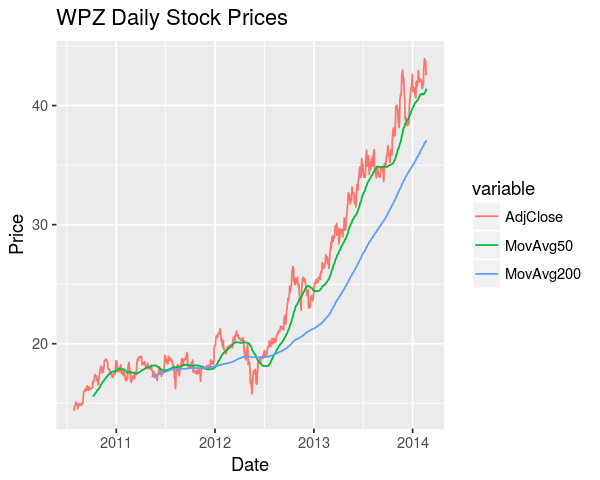

In [235]:
print(plot_list[[1]])

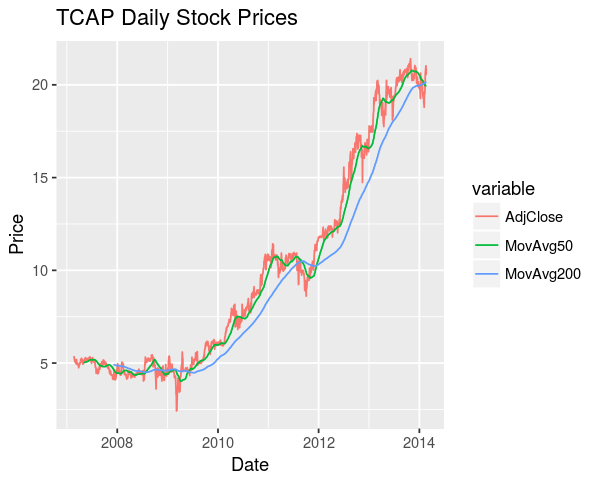

In [236]:
print(plot_list[[2]])

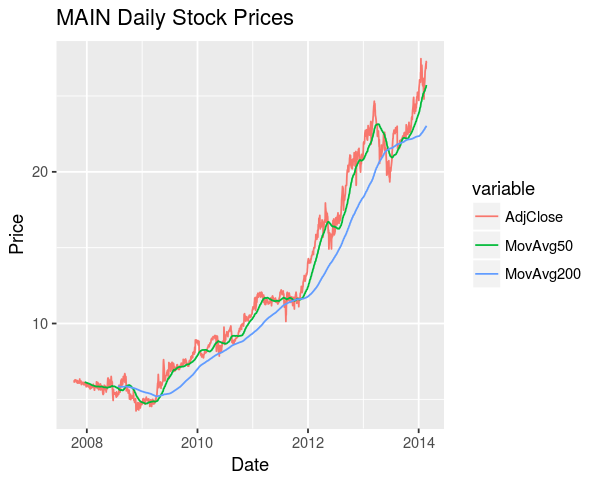

In [237]:
print(plot_list[[3]])

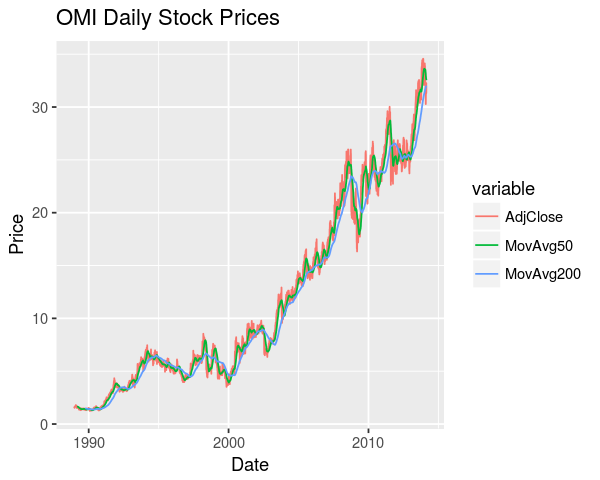

In [238]:
print(plot_list[[4]])

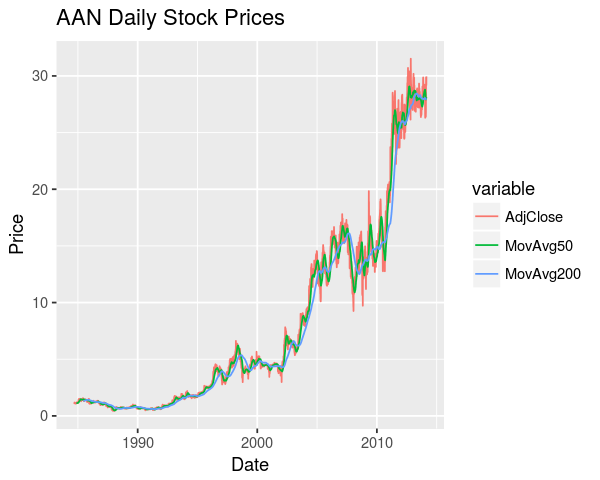

In [239]:
print(plot_list[[5]])

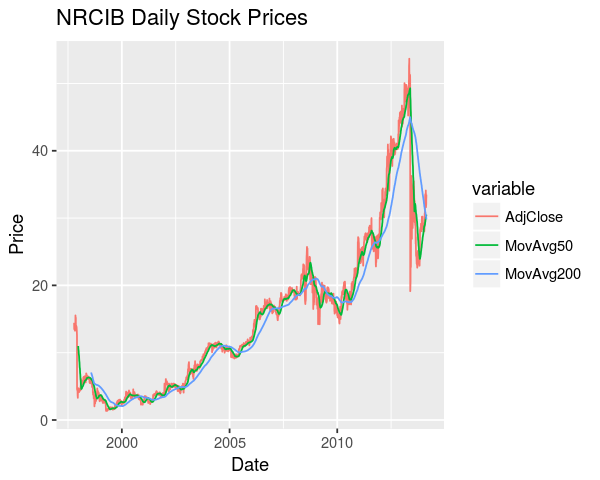

In [240]:
print(plot_list[[6]])

Combine all the Companies together

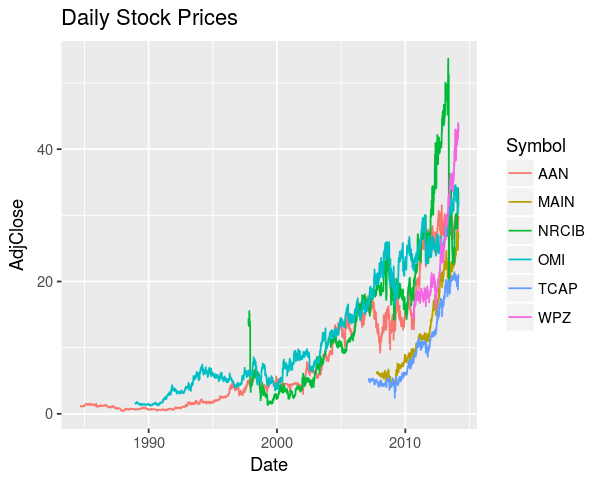

In [245]:
qplot(Date, AdjClose, data=stocks, geom="line", color=Symbol, main="Daily Stock Prices")

The combined historical price chart we generated shows us the degree to which our target stocks' prices move in tandem. If you are looking to invest in multiple stocks, it can be good to invest in ones where the prices are not too highly correlated. You can also visualize how volatile one stock has been when compared to another. In our graph, you can see that the symbols WPZ and NRCIB have been fairly volatile, while the other symbols have been
somewhat less volatile.

Then, let's graph the price summaries:

In [252]:
price_summaries

Symbol,open,high,low,close
WPZ,56.28,59.19000,21.250005,14.359208
TCAP,29.00,30.70000,4.000000,5.376137
MAIN,35.39,35.72000,8.340000,6.240782
OMI,35.03,55.00001,7.562505,1.543638
AAN,29.67,32.53000,6.499980,1.131833
NRCIB,39.26,64.36000,1.750000,14.439936


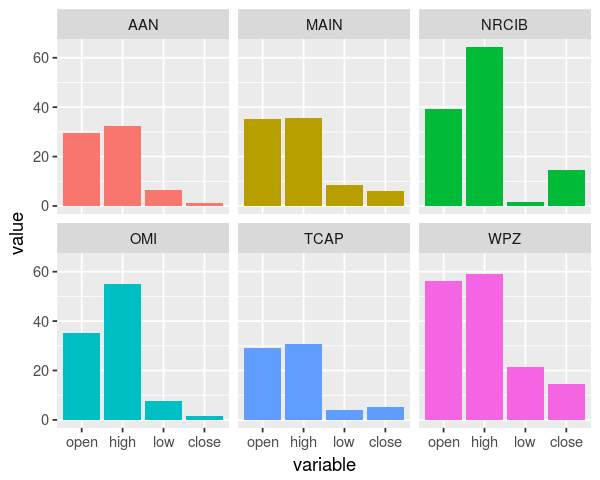

In [250]:
summary <- melt(price_summaries,id="Symbol")

ggplot(summary, aes(x=variable, y=value, fill=Symbol)) + 
    geom_bar(stat="identity") + 
    facet_wrap(~Symbol) + 
    guides(fill=FALSE)

This chart shows the opening, high, low, and closing prices for the period analyzed. The opening price is the very first price the stock traded at, the closing price is the very last price the stock has traded at thus far, the high price is the highest price the stock has been at during the period, and the low price is the lowest price the stock has been at during the period. The volatility mentioned previously can be viewed in a different way on this graph, as you can clearly see the difference between the highs and the lows of our two most volatile stocks. This chart also lets you see where the stock's closing price is relative to its all-time high and all-time low, which might help to give you a clue of the fairness of its current valuation.